## 2023-06-11

### Get posts discourse data

As of 2023-01-25, the export of post **per catergory** is working as expected.

After downloading each export, the `-<category>` qualified need to be explicitly added.

In [2]:
import pandas as pd

def read_post_csv(filepath, category):
    df = pd.read_csv(filepath)
    df.rename(columns={'Day':'date', 'Count':'%s posts' % category}, inplace=True)
    df = df.set_index("date")
    return df

In [9]:
posts = {
    "2021": {
        "devel": "28_Slicer_Discourse/posts-devel-220117-223417.csv",
        "support": "28_Slicer_Discourse/posts-support-220117-223404.csv",
    },
    "2022": {
        "devel": "28_Slicer_Discourse/posts-devel-221206-010128.csv",
        "support": "28_Slicer_Discourse/posts-support-221206-010120.csv",
    },
    "2023.01": {
        "devel": "28_Slicer_Discourse/posts-devel-230125-195927.csv",
        "support": "28_Slicer_Discourse/posts-support-230125-195940.csv",
        "community": "28_Slicer_Discourse/posts-community-230125-195957.csv",
    },
    "2023.06": {
        "devel": "28_Slicer_Discourse/devel-posts-230612-024059.csv",
        "support": "28_Slicer_Discourse/support-posts-230612-024008.csv",
        "community": "28_Slicer_Discourse/community-posts-230612-024203.csv",
    },
}

year = "2023.06"

devel_df = read_post_csv(posts[year]["devel"], "devel")
support_df = read_post_csv(posts[year]["support"], "support")
community_df = read_post_csv(posts[year]["community"], "community")

### Merge datasets

In [10]:
df = pd.DataFrame.merge(support_df, devel_df, left_on="date", right_on="date", how="outer")
df = pd.DataFrame.merge(df, community_df, left_on="date", right_on="date", how="outer")

df.fillna(0, inplace=True)

df = df.sort_index(level=0)

df.index = pd.to_datetime(df.index)

df

,support posts,devel posts,community posts
date,,,
2023-01-01,11,3.0,0.0
2023-01-02,6,3.0,0.0
2023-01-03,26,1.0,3.0
2023-01-04,23,4.0,0.0
2023-01-05,30,11.0,0.0
...,...,...,...
2023-06-08,24,3.0,4.0
2023-06-09,30,6.0,0.0
2023-06-10,15,6.0,0.0


In [11]:
%matplotlib inline

import matplotlib
matplotlib.style.use('ggplot')

### Number of Discourse posts per week

<AxesSubplot: xlabel='date'>

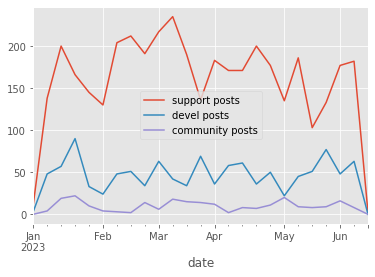

In [12]:
df.resample('W').sum().plot()

### Average number of Discourse posts per week

In [13]:
df.resample('W').sum().mean()

support posts      159.80
devel posts         45.72
community posts      9.64
dtype: float64

### Average number of Discourse posts per day

In [16]:
df.mean(axis='index')

support posts      24.509202
devel posts         7.012270
community posts     1.478528
dtype: float64

### Cumulative number of Discourse posts

<AxesSubplot: xlabel='date'>

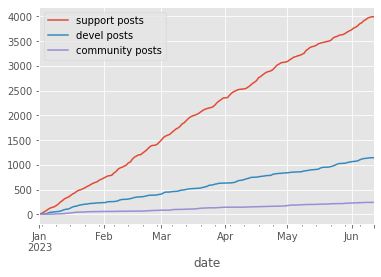

In [17]:
df.cumsum().plot()

### Signups since April 2017

<AxesSubplot: xlabel='date'>

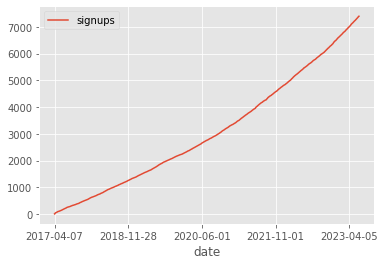

In [18]:
signups_exports = {
    "2022.01": "28_Slicer_Discourse/signups-220117-232909.csv", 
    "2022.12": "28_Slicer_Discourse/signups-221206-010707.csv",
    "2023.01": "28_Slicer_Discourse/signups-230125-194709.csv",
    "2023.06": "28_Slicer_Discourse/signups-230612-024844.csv",
}
df_signups = pd.read_csv(signups_exports["2023.06"])
df_signups.rename(columns={'Day':'date', 'Count':'signups'}, inplace=True)
df_signups = df_signups.set_index("date")
df_signups.cumsum().plot()

### Users

In [8]:
users_exports = {
    "2022.12": "28_Slicer_Discourse/user-list-221206-005751.csv",
    "2023.01": "28_Slicer_Discourse/user-list-230125-194541.csv",
    "2023.06": "28_Slicer_Discourse/user-list-230612-030250.csv",
    "2024.05": "28_Slicer_Discourse/user-list-240502-155313.csv",
}

df_users = pd.read_csv(users_exports["2024.05"])
df_users['created_at'] = pd.to_datetime(df_users['created_at'])
#df_users.info()

In [4]:
df_users['year'] = df_users['created_at'].apply(lambda x: "%d" % (x.year))

In [5]:
df_users.count()

id                            8932
name                          7268
username                      8932
email                         8932
title                            0
created_at                    8932
last_seen_at                  8906
last_posted_at                6536
last_emailed_at               8919
trust_level                   8932
approved                      8932
suspended_at                     2
suspended_till                   2
silenced_till                    0
active                        8932
admin                         8932
moderator                     8932
ip_address                    8909
staged                        8932
secondary_emails                38
topics_entered                8932
posts_read_count              8932
time_read                     8932
topic_count                   8932
post_count                    8932
likes_given                   8932
likes_received                8932
location                       234
website             

## 2019-04-09

### Get Discourse data

As of 2019-04-09, the export of post **per catergory** isn't working. The following python dictionnaries were obtained copying the XHR response on discourse website when selecting the range and category from the user interface. To ensure a proper parsing by python, the string `null`, `true` and `false` where respectively replaced with `None`, `True` and `False`.

In [8]:
import json
support_response = {"reports":[{"type":"topics","title":"Topics","xaxis":"Day","yaxis":"Number of new topics","description":"New topics created during this period.","data":[{"x":"2017-04-17","y":2},{"x":"2017-04-19","y":1},{"x":"2017-04-20","y":2},{"x":"2017-04-21","y":4},{"x":"2017-04-22","y":1},{"x":"2017-04-23","y":1},{"x":"2017-04-24","y":1},{"x":"2017-04-25","y":1},{"x":"2017-04-26","y":3},{"x":"2017-04-27","y":3},{"x":"2017-04-28","y":2},{"x":"2017-04-30","y":1},{"x":"2017-05-01","y":2},{"x":"2017-05-02","y":6},{"x":"2017-05-03","y":3},{"x":"2017-05-04","y":2},{"x":"2017-05-05","y":1},{"x":"2017-05-06","y":1},{"x":"2017-05-08","y":3},{"x":"2017-05-09","y":1},{"x":"2017-05-11","y":2},{"x":"2017-05-12","y":1},{"x":"2017-05-14","y":3},{"x":"2017-05-16","y":4},{"x":"2017-05-17","y":2},{"x":"2017-05-18","y":1},{"x":"2017-05-19","y":3},{"x":"2017-05-20","y":1},{"x":"2017-05-21","y":2},{"x":"2017-05-22","y":1},{"x":"2017-05-23","y":2},{"x":"2017-05-24","y":7},{"x":"2017-05-25","y":2},{"x":"2017-05-26","y":1},{"x":"2017-05-27","y":1},{"x":"2017-05-29","y":2},{"x":"2017-05-31","y":1},{"x":"2017-06-01","y":1},{"x":"2017-06-02","y":4},{"x":"2017-06-05","y":1},{"x":"2017-06-06","y":4},{"x":"2017-06-07","y":1},{"x":"2017-06-08","y":2},{"x":"2017-06-09","y":2},{"x":"2017-06-10","y":1},{"x":"2017-06-11","y":1},{"x":"2017-06-12","y":1},{"x":"2017-06-13","y":6},{"x":"2017-06-14","y":3},{"x":"2017-06-15","y":3},{"x":"2017-06-16","y":2},{"x":"2017-06-18","y":1},{"x":"2017-06-19","y":3},{"x":"2017-06-20","y":5},{"x":"2017-06-21","y":3},{"x":"2017-06-22","y":2},{"x":"2017-06-23","y":2},{"x":"2017-06-26","y":3},{"x":"2017-06-27","y":3},{"x":"2017-06-28","y":5},{"x":"2017-06-29","y":3},{"x":"2017-06-30","y":3},{"x":"2017-07-01","y":2},{"x":"2017-07-02","y":1},{"x":"2017-07-03","y":1},{"x":"2017-07-04","y":3},{"x":"2017-07-05","y":2},{"x":"2017-07-06","y":5},{"x":"2017-07-07","y":3},{"x":"2017-07-09","y":1},{"x":"2017-07-10","y":3},{"x":"2017-07-11","y":6},{"x":"2017-07-12","y":3},{"x":"2017-07-13","y":1},{"x":"2017-07-14","y":3},{"x":"2017-07-15","y":1},{"x":"2017-07-16","y":1},{"x":"2017-07-17","y":2},{"x":"2017-07-18","y":1},{"x":"2017-07-19","y":2},{"x":"2017-07-20","y":3},{"x":"2017-07-21","y":1},{"x":"2017-07-22","y":2},{"x":"2017-07-23","y":2},{"x":"2017-07-25","y":1},{"x":"2017-07-26","y":2},{"x":"2017-07-27","y":3},{"x":"2017-07-28","y":1},{"x":"2017-07-29","y":1},{"x":"2017-07-31","y":1},{"x":"2017-08-01","y":2},{"x":"2017-08-02","y":2},{"x":"2017-08-03","y":4},{"x":"2017-08-04","y":2},{"x":"2017-08-05","y":1},{"x":"2017-08-07","y":3},{"x":"2017-08-08","y":1},{"x":"2017-08-09","y":5},{"x":"2017-08-10","y":1},{"x":"2017-08-11","y":1},{"x":"2017-08-13","y":1},{"x":"2017-08-14","y":2},{"x":"2017-08-15","y":4},{"x":"2017-08-16","y":1},{"x":"2017-08-17","y":2},{"x":"2017-08-18","y":1},{"x":"2017-08-19","y":1},{"x":"2017-08-20","y":1},{"x":"2017-08-21","y":3},{"x":"2017-08-22","y":3},{"x":"2017-08-23","y":4},{"x":"2017-08-24","y":2},{"x":"2017-08-25","y":4},{"x":"2017-08-26","y":1},{"x":"2017-08-27","y":1},{"x":"2017-08-28","y":5},{"x":"2017-08-29","y":1},{"x":"2017-08-30","y":1},{"x":"2017-08-31","y":3},{"x":"2017-09-01","y":4},{"x":"2017-09-03","y":1},{"x":"2017-09-04","y":1},{"x":"2017-09-05","y":1},{"x":"2017-09-06","y":4},{"x":"2017-09-07","y":1},{"x":"2017-09-08","y":2},{"x":"2017-09-09","y":1},{"x":"2017-09-10","y":2},{"x":"2017-09-11","y":4},{"x":"2017-09-13","y":4},{"x":"2017-09-14","y":2},{"x":"2017-09-15","y":2},{"x":"2017-09-16","y":2},{"x":"2017-09-17","y":1},{"x":"2017-09-18","y":6},{"x":"2017-09-19","y":2},{"x":"2017-09-20","y":4},{"x":"2017-09-21","y":4},{"x":"2017-09-22","y":2},{"x":"2017-09-23","y":1},{"x":"2017-09-24","y":2},{"x":"2017-09-25","y":3},{"x":"2017-09-26","y":3},{"x":"2017-09-27","y":2},{"x":"2017-09-28","y":2},{"x":"2017-09-29","y":2},{"x":"2017-10-02","y":3},{"x":"2017-10-03","y":3},{"x":"2017-10-04","y":2},{"x":"2017-10-05","y":5},{"x":"2017-10-06","y":1},{"x":"2017-10-07","y":2},{"x":"2017-10-09","y":2},{"x":"2017-10-10","y":1},{"x":"2017-10-11","y":1},{"x":"2017-10-12","y":2},{"x":"2017-10-13","y":1},{"x":"2017-10-14","y":1},{"x":"2017-10-15","y":1},{"x":"2017-10-17","y":3},{"x":"2017-10-19","y":3},{"x":"2017-10-20","y":3},{"x":"2017-10-21","y":1},{"x":"2017-10-22","y":1},{"x":"2017-10-23","y":5},{"x":"2017-10-24","y":5},{"x":"2017-10-25","y":3},{"x":"2017-10-27","y":7},{"x":"2017-10-28","y":1},{"x":"2017-10-29","y":1},{"x":"2017-10-30","y":3},{"x":"2017-10-31","y":4},{"x":"2017-11-01","y":2},{"x":"2017-11-02","y":3},{"x":"2017-11-03","y":9},{"x":"2017-11-04","y":3},{"x":"2017-11-05","y":2},{"x":"2017-11-06","y":3},{"x":"2017-11-07","y":4},{"x":"2017-11-08","y":8},{"x":"2017-11-09","y":8},{"x":"2017-11-10","y":1},{"x":"2017-11-12","y":1},{"x":"2017-11-13","y":4},{"x":"2017-11-14","y":2},{"x":"2017-11-15","y":2},{"x":"2017-11-16","y":2},{"x":"2017-11-17","y":3},{"x":"2017-11-19","y":2},{"x":"2017-11-20","y":2},{"x":"2017-11-21","y":2},{"x":"2017-11-22","y":3},{"x":"2017-11-23","y":2},{"x":"2017-11-24","y":1},{"x":"2017-11-27","y":5},{"x":"2017-11-28","y":5},{"x":"2017-11-29","y":5},{"x":"2017-11-30","y":3},{"x":"2017-12-01","y":3},{"x":"2017-12-02","y":2},{"x":"2017-12-03","y":2},{"x":"2017-12-04","y":1},{"x":"2017-12-05","y":3},{"x":"2017-12-06","y":1},{"x":"2017-12-07","y":4},{"x":"2017-12-09","y":2},{"x":"2017-12-10","y":1},{"x":"2017-12-11","y":4},{"x":"2017-12-12","y":9},{"x":"2017-12-14","y":4},{"x":"2017-12-15","y":1},{"x":"2017-12-16","y":1},{"x":"2017-12-17","y":2},{"x":"2017-12-18","y":1},{"x":"2017-12-19","y":1},{"x":"2017-12-20","y":1},{"x":"2017-12-21","y":3},{"x":"2017-12-22","y":1},{"x":"2017-12-23","y":1},{"x":"2017-12-24","y":1},{"x":"2017-12-26","y":4},{"x":"2017-12-27","y":2},{"x":"2017-12-28","y":1},{"x":"2017-12-29","y":2},{"x":"2017-12-30","y":3},{"x":"2018-01-01","y":1},{"x":"2018-01-02","y":2},{"x":"2018-01-05","y":1},{"x":"2018-01-06","y":5},{"x":"2018-01-07","y":1},{"x":"2018-01-08","y":5},{"x":"2018-01-09","y":4},{"x":"2018-01-10","y":2},{"x":"2018-01-11","y":2},{"x":"2018-01-12","y":1},{"x":"2018-01-13","y":2},{"x":"2018-01-14","y":1},{"x":"2018-01-15","y":3},{"x":"2018-01-16","y":5},{"x":"2018-01-17","y":2},{"x":"2018-01-18","y":2},{"x":"2018-01-19","y":3},{"x":"2018-01-20","y":1},{"x":"2018-01-22","y":6},{"x":"2018-01-23","y":6},{"x":"2018-01-24","y":4},{"x":"2018-01-25","y":5},{"x":"2018-01-26","y":6},{"x":"2018-01-27","y":2},{"x":"2018-01-28","y":3},{"x":"2018-01-29","y":4},{"x":"2018-01-30","y":5},{"x":"2018-01-31","y":9},{"x":"2018-02-01","y":4},{"x":"2018-02-02","y":4},{"x":"2018-02-03","y":1},{"x":"2018-02-04","y":2},{"x":"2018-02-05","y":2},{"x":"2018-02-06","y":2},{"x":"2018-02-07","y":5},{"x":"2018-02-09","y":1},{"x":"2018-02-12","y":2},{"x":"2018-02-13","y":2},{"x":"2018-02-15","y":4},{"x":"2018-02-16","y":3},{"x":"2018-02-18","y":4},{"x":"2018-02-19","y":5},{"x":"2018-02-20","y":7},{"x":"2018-02-21","y":2},{"x":"2018-02-22","y":7},{"x":"2018-02-23","y":4},{"x":"2018-02-24","y":2},{"x":"2018-02-25","y":2},{"x":"2018-02-26","y":1},{"x":"2018-02-27","y":1},{"x":"2018-02-28","y":6},{"x":"2018-03-01","y":3},{"x":"2018-03-02","y":3},{"x":"2018-03-04","y":2},{"x":"2018-03-05","y":1},{"x":"2018-03-06","y":4},{"x":"2018-03-07","y":2},{"x":"2018-03-08","y":2},{"x":"2018-03-09","y":3},{"x":"2018-03-10","y":2},{"x":"2018-03-11","y":5},{"x":"2018-03-12","y":3},{"x":"2018-03-13","y":4},{"x":"2018-03-14","y":3},{"x":"2018-03-15","y":6},{"x":"2018-03-16","y":3},{"x":"2018-03-17","y":1},{"x":"2018-03-18","y":1},{"x":"2018-03-19","y":8},{"x":"2018-03-20","y":6},{"x":"2018-03-21","y":5},{"x":"2018-03-22","y":6},{"x":"2018-03-26","y":7},{"x":"2018-03-27","y":4},{"x":"2018-03-28","y":7},{"x":"2018-03-29","y":3},{"x":"2018-03-30","y":3},{"x":"2018-04-02","y":1},{"x":"2018-04-03","y":5},{"x":"2018-04-04","y":1},{"x":"2018-04-05","y":6},{"x":"2018-04-06","y":4},{"x":"2018-04-07","y":3},{"x":"2018-04-09","y":6},{"x":"2018-04-10","y":5},{"x":"2018-04-12","y":3},{"x":"2018-04-13","y":6},{"x":"2018-04-14","y":3},{"x":"2018-04-16","y":4},{"x":"2018-04-17","y":6},{"x":"2018-04-18","y":3},{"x":"2018-04-19","y":3},{"x":"2018-04-20","y":5},{"x":"2018-04-21","y":1},{"x":"2018-04-23","y":4},{"x":"2018-04-24","y":3},{"x":"2018-04-25","y":5},{"x":"2018-04-26","y":8},{"x":"2018-04-27","y":6},{"x":"2018-04-28","y":1},{"x":"2018-04-29","y":1},{"x":"2018-04-30","y":5},{"x":"2018-05-01","y":3},{"x":"2018-05-02","y":1},{"x":"2018-05-03","y":2},{"x":"2018-05-04","y":3},{"x":"2018-05-06","y":3},{"x":"2018-05-07","y":3},{"x":"2018-05-08","y":1},{"x":"2018-05-09","y":3},{"x":"2018-05-10","y":3},{"x":"2018-05-11","y":4},{"x":"2018-05-12","y":1},{"x":"2018-05-14","y":2},{"x":"2018-05-15","y":1},{"x":"2018-05-16","y":2},{"x":"2018-05-17","y":7},{"x":"2018-05-18","y":3},{"x":"2018-05-20","y":1},{"x":"2018-05-21","y":3},{"x":"2018-05-22","y":9},{"x":"2018-05-23","y":6},{"x":"2018-05-24","y":4},{"x":"2018-05-25","y":3},{"x":"2018-05-26","y":1},{"x":"2018-05-27","y":4},{"x":"2018-05-28","y":5},{"x":"2018-05-29","y":4},{"x":"2018-05-30","y":7},{"x":"2018-06-01","y":5},{"x":"2018-06-02","y":1},{"x":"2018-06-03","y":3},{"x":"2018-06-04","y":2},{"x":"2018-06-05","y":4},{"x":"2018-06-06","y":6},{"x":"2018-06-07","y":10},{"x":"2018-06-08","y":2},{"x":"2018-06-09","y":1},{"x":"2018-06-10","y":1},{"x":"2018-06-11","y":2},{"x":"2018-06-12","y":7},{"x":"2018-06-13","y":6},{"x":"2018-06-14","y":5},{"x":"2018-06-15","y":4},{"x":"2018-06-16","y":1},{"x":"2018-06-17","y":2},{"x":"2018-06-18","y":4},{"x":"2018-06-19","y":7},{"x":"2018-06-20","y":3},{"x":"2018-06-21","y":5},{"x":"2018-06-22","y":1},{"x":"2018-06-24","y":1},{"x":"2018-06-25","y":9},{"x":"2018-06-26","y":10},{"x":"2018-06-27","y":3},{"x":"2018-06-28","y":3},{"x":"2018-06-29","y":2},{"x":"2018-06-30","y":2},{"x":"2018-07-01","y":1},{"x":"2018-07-02","y":2},{"x":"2018-07-03","y":3},{"x":"2018-07-05","y":7},{"x":"2018-07-06","y":6},{"x":"2018-07-07","y":1},{"x":"2018-07-09","y":7},{"x":"2018-07-10","y":9},{"x":"2018-07-11","y":4},{"x":"2018-07-12","y":4},{"x":"2018-07-13","y":1},{"x":"2018-07-15","y":2},{"x":"2018-07-16","y":1},{"x":"2018-07-17","y":5},{"x":"2018-07-18","y":1},{"x":"2018-07-19","y":4},{"x":"2018-07-20","y":6},{"x":"2018-07-21","y":5},{"x":"2018-07-22","y":3},{"x":"2018-07-23","y":1},{"x":"2018-07-25","y":3},{"x":"2018-07-26","y":2},{"x":"2018-07-27","y":3},{"x":"2018-07-28","y":2},{"x":"2018-07-30","y":1},{"x":"2018-07-31","y":3},{"x":"2018-08-01","y":2},{"x":"2018-08-02","y":4},{"x":"2018-08-03","y":2},{"x":"2018-08-04","y":3},{"x":"2018-08-05","y":2},{"x":"2018-08-06","y":2},{"x":"2018-08-07","y":2},{"x":"2018-08-08","y":5},{"x":"2018-08-09","y":3},{"x":"2018-08-10","y":3},{"x":"2018-08-11","y":1},{"x":"2018-08-12","y":3},{"x":"2018-08-13","y":4},{"x":"2018-08-14","y":3},{"x":"2018-08-15","y":3},{"x":"2018-08-16","y":6},{"x":"2018-08-17","y":3},{"x":"2018-08-18","y":1},{"x":"2018-08-19","y":3},{"x":"2018-08-20","y":5},{"x":"2018-08-21","y":4},{"x":"2018-08-22","y":2},{"x":"2018-08-23","y":2},{"x":"2018-08-24","y":3},{"x":"2018-08-26","y":2},{"x":"2018-08-28","y":9},{"x":"2018-08-29","y":1},{"x":"2018-08-30","y":5},{"x":"2018-08-31","y":4},{"x":"2018-09-01","y":1},{"x":"2018-09-02","y":1},{"x":"2018-09-03","y":2},{"x":"2018-09-04","y":4},{"x":"2018-09-05","y":3},{"x":"2018-09-06","y":5},{"x":"2018-09-07","y":4},{"x":"2018-09-08","y":1},{"x":"2018-09-09","y":4},{"x":"2018-09-10","y":7},{"x":"2018-09-11","y":5},{"x":"2018-09-12","y":7},{"x":"2018-09-13","y":6},{"x":"2018-09-14","y":5},{"x":"2018-09-15","y":1},{"x":"2018-09-16","y":2},{"x":"2018-09-17","y":1},{"x":"2018-09-18","y":3},{"x":"2018-09-20","y":3},{"x":"2018-09-21","y":2},{"x":"2018-09-22","y":1},{"x":"2018-09-23","y":2},{"x":"2018-09-24","y":3},{"x":"2018-09-25","y":1},{"x":"2018-09-26","y":1},{"x":"2018-09-27","y":5},{"x":"2018-09-28","y":3},{"x":"2018-09-29","y":1},{"x":"2018-09-30","y":3},{"x":"2018-10-01","y":5},{"x":"2018-10-02","y":4},{"x":"2018-10-03","y":7},{"x":"2018-10-04","y":4},{"x":"2018-10-05","y":8},{"x":"2018-10-07","y":2},{"x":"2018-10-08","y":4},{"x":"2018-10-09","y":3},{"x":"2018-10-10","y":5},{"x":"2018-10-11","y":6},{"x":"2018-10-12","y":3},{"x":"2018-10-13","y":2},{"x":"2018-10-14","y":2},{"x":"2018-10-15","y":3},{"x":"2018-10-16","y":8},{"x":"2018-10-17","y":10},{"x":"2018-10-18","y":6},{"x":"2018-10-19","y":8},{"x":"2018-10-20","y":1},{"x":"2018-10-22","y":5},{"x":"2018-10-23","y":9},{"x":"2018-10-24","y":2},{"x":"2018-10-25","y":9},{"x":"2018-10-26","y":7},{"x":"2018-10-28","y":2},{"x":"2018-10-29","y":5},{"x":"2018-10-30","y":8},{"x":"2018-10-31","y":4},{"x":"2018-11-01","y":4},{"x":"2018-11-02","y":1},{"x":"2018-11-04","y":1},{"x":"2018-11-05","y":7},{"x":"2018-11-06","y":8},{"x":"2018-11-07","y":5},{"x":"2018-11-08","y":6},{"x":"2018-11-09","y":4},{"x":"2018-11-10","y":3},{"x":"2018-11-11","y":2},{"x":"2018-11-12","y":4},{"x":"2018-11-13","y":6},{"x":"2018-11-14","y":3},{"x":"2018-11-15","y":1},{"x":"2018-11-16","y":1},{"x":"2018-11-17","y":1},{"x":"2018-11-18","y":2},{"x":"2018-11-19","y":7},{"x":"2018-11-20","y":7},{"x":"2018-11-21","y":3},{"x":"2018-11-22","y":3},{"x":"2018-11-23","y":1},{"x":"2018-11-24","y":1},{"x":"2018-11-26","y":4},{"x":"2018-11-27","y":8},{"x":"2018-11-28","y":2},{"x":"2018-11-29","y":2},{"x":"2018-11-30","y":3},{"x":"2018-12-01","y":1},{"x":"2018-12-03","y":3},{"x":"2018-12-04","y":11},{"x":"2018-12-05","y":5},{"x":"2018-12-06","y":6},{"x":"2018-12-07","y":5},{"x":"2018-12-08","y":1},{"x":"2018-12-09","y":2},{"x":"2018-12-10","y":3},{"x":"2018-12-11","y":5},{"x":"2018-12-12","y":5},{"x":"2018-12-13","y":3},{"x":"2018-12-14","y":3},{"x":"2018-12-16","y":3},{"x":"2018-12-17","y":4},{"x":"2018-12-18","y":5},{"x":"2018-12-19","y":5},{"x":"2018-12-20","y":2},{"x":"2018-12-21","y":2},{"x":"2018-12-22","y":1},{"x":"2018-12-23","y":4},{"x":"2018-12-24","y":2},{"x":"2018-12-25","y":1},{"x":"2018-12-26","y":1},{"x":"2018-12-27","y":2},{"x":"2018-12-28","y":3},{"x":"2018-12-29","y":4},{"x":"2018-12-30","y":5},{"x":"2019-01-01","y":2},{"x":"2019-01-02","y":2},{"x":"2019-01-03","y":5},{"x":"2019-01-04","y":1},{"x":"2019-01-05","y":3},{"x":"2019-01-06","y":2},{"x":"2019-01-07","y":6},{"x":"2019-01-08","y":3},{"x":"2019-01-09","y":1},{"x":"2019-01-10","y":2},{"x":"2019-01-11","y":1},{"x":"2019-01-13","y":5},{"x":"2019-01-14","y":2},{"x":"2019-01-15","y":2},{"x":"2019-01-17","y":7},{"x":"2019-01-18","y":1},{"x":"2019-01-19","y":4},{"x":"2019-01-20","y":1},{"x":"2019-01-21","y":9},{"x":"2019-01-22","y":6},{"x":"2019-01-23","y":5},{"x":"2019-01-24","y":4},{"x":"2019-01-25","y":6},{"x":"2019-01-26","y":2},{"x":"2019-01-27","y":2},{"x":"2019-01-28","y":5},{"x":"2019-01-29","y":9},{"x":"2019-01-30","y":8},{"x":"2019-01-31","y":5},{"x":"2019-02-01","y":1},{"x":"2019-02-02","y":2},{"x":"2019-02-03","y":4},{"x":"2019-02-04","y":1},{"x":"2019-02-05","y":8},{"x":"2019-02-06","y":6},{"x":"2019-02-07","y":5},{"x":"2019-02-08","y":9},{"x":"2019-02-09","y":2},{"x":"2019-02-10","y":3},{"x":"2019-02-11","y":6},{"x":"2019-02-12","y":5},{"x":"2019-02-13","y":11},{"x":"2019-02-14","y":5},{"x":"2019-02-15","y":5},{"x":"2019-02-16","y":3},{"x":"2019-02-17","y":1},{"x":"2019-02-18","y":1},{"x":"2019-02-19","y":5},{"x":"2019-02-20","y":9},{"x":"2019-02-21","y":6},{"x":"2019-02-22","y":3},{"x":"2019-02-24","y":1},{"x":"2019-02-25","y":2},{"x":"2019-02-26","y":4},{"x":"2019-02-27","y":8},{"x":"2019-02-28","y":4},{"x":"2019-03-01","y":5},{"x":"2019-03-02","y":4},{"x":"2019-03-03","y":1},{"x":"2019-03-04","y":2},{"x":"2019-03-05","y":8},{"x":"2019-03-06","y":7},{"x":"2019-03-07","y":6},{"x":"2019-03-08","y":6},{"x":"2019-03-10","y":4},{"x":"2019-03-11","y":6},{"x":"2019-03-12","y":4},{"x":"2019-03-13","y":5},{"x":"2019-03-14","y":8},{"x":"2019-03-15","y":5},{"x":"2019-03-16","y":1},{"x":"2019-03-17","y":2},{"x":"2019-03-18","y":7},{"x":"2019-03-19","y":2},{"x":"2019-03-20","y":3},{"x":"2019-03-21","y":3},{"x":"2019-03-22","y":3},{"x":"2019-03-24","y":4},{"x":"2019-03-25","y":5},{"x":"2019-03-26","y":2},{"x":"2019-03-27","y":3},{"x":"2019-03-28","y":5},{"x":"2019-03-30","y":2},{"x":"2019-04-01","y":8},{"x":"2019-04-02","y":2},{"x":"2019-04-03","y":2},{"x":"2019-04-04","y":6},{"x":"2019-04-05","y":3},{"x":"2019-04-06","y":3},{"x":"2019-04-08","y":4},{"x":"2019-04-09","y":2},{"x":"2019-04-10","y":1},{"x":"2019-04-11","y":7},{"x":"2019-04-12","y":4},{"x":"2019-04-15","y":1},{"x":"2019-04-16","y":1},{"x":"2019-04-17","y":8},{"x":"2019-04-18","y":1},{"x":"2019-04-19","y":5},{"x":"2019-04-20","y":1},{"x":"2019-04-22","y":4},{"x":"2019-04-23","y":7},{"x":"2019-04-24","y":6},{"x":"2019-04-26","y":7},{"x":"2019-04-27","y":3},{"x":"2019-04-28","y":2},{"x":"2019-04-29","y":6},{"x":"2019-04-30","y":5},{"x":"2019-05-01","y":3},{"x":"2019-05-02","y":4},{"x":"2019-05-03","y":5},{"x":"2019-05-04","y":1},{"x":"2019-05-05","y":1},{"x":"2019-05-06","y":2},{"x":"2019-05-07","y":2},{"x":"2019-05-08","y":2},{"x":"2019-05-09","y":1}],"start_date":"2017-04-17T00:00:00Z","end_date":"2019-05-09T23:59:59Z","prev_data":None,"prev_start_date":"2015-03-26T00:00:00Z","prev_end_date":"2017-04-17T00:00:00Z","prev30Days":None,"dates_filtering":True,"report_key":"reports:topics:20170417:20190509:[:prev_period]:50:{\"category\":\"11\"}:4","primary_color":"rgba(0,136,204,1)","secondary_color":"rgba(0,136,204,0.1)","available_filters":[{"id":"category","allow_any":False,"choices":[],"default":"11"}],"labels":[{"type":"date","property":"x","title":"Day"},{"type":"number","property":"y","title":"Count"}],"average":False,"percent":False,"higher_is_better":True,"modes":["table","chart"],"prev_period":11,"limit":50}]}
devel_response = {"reports":[{"type":"topics","title":"Topics","xaxis":"Day","yaxis":"Number of new topics","description":"New topics created during this period.","data":[{"x":"2017-04-17","y":1},{"x":"2017-04-18","y":2},{"x":"2017-04-19","y":1},{"x":"2017-04-20","y":2},{"x":"2017-04-21","y":3},{"x":"2017-04-22","y":2},{"x":"2017-04-23","y":1},{"x":"2017-04-26","y":3},{"x":"2017-04-27","y":5},{"x":"2017-04-28","y":3},{"x":"2017-04-29","y":1},{"x":"2017-05-02","y":2},{"x":"2017-05-04","y":3},{"x":"2017-05-05","y":2},{"x":"2017-05-06","y":1},{"x":"2017-05-10","y":3},{"x":"2017-05-12","y":1},{"x":"2017-05-13","y":1},{"x":"2017-05-15","y":4},{"x":"2017-05-16","y":4},{"x":"2017-05-17","y":1},{"x":"2017-05-19","y":1},{"x":"2017-05-20","y":1},{"x":"2017-05-21","y":1},{"x":"2017-05-23","y":1},{"x":"2017-05-24","y":3},{"x":"2017-05-25","y":1},{"x":"2017-05-30","y":3},{"x":"2017-05-31","y":2},{"x":"2017-06-02","y":5},{"x":"2017-06-03","y":1},{"x":"2017-06-06","y":1},{"x":"2017-06-13","y":3},{"x":"2017-06-14","y":1},{"x":"2017-06-15","y":2},{"x":"2017-06-19","y":1},{"x":"2017-06-20","y":3},{"x":"2017-06-21","y":2},{"x":"2017-06-23","y":3},{"x":"2017-06-24","y":1},{"x":"2017-06-26","y":2},{"x":"2017-06-27","y":1},{"x":"2017-06-29","y":1},{"x":"2017-06-30","y":2},{"x":"2017-07-05","y":3},{"x":"2017-07-07","y":1},{"x":"2017-07-11","y":2},{"x":"2017-07-12","y":1},{"x":"2017-07-14","y":1},{"x":"2017-07-16","y":1},{"x":"2017-07-18","y":1},{"x":"2017-07-19","y":2},{"x":"2017-07-20","y":4},{"x":"2017-07-21","y":2},{"x":"2017-07-23","y":2},{"x":"2017-07-24","y":2},{"x":"2017-07-25","y":3},{"x":"2017-07-26","y":2},{"x":"2017-07-27","y":1},{"x":"2017-07-28","y":1},{"x":"2017-07-29","y":1},{"x":"2017-07-31","y":2},{"x":"2017-08-01","y":5},{"x":"2017-08-02","y":3},{"x":"2017-08-03","y":2},{"x":"2017-08-04","y":2},{"x":"2017-08-05","y":2},{"x":"2017-08-07","y":1},{"x":"2017-08-08","y":1},{"x":"2017-08-09","y":2},{"x":"2017-08-11","y":2},{"x":"2017-08-13","y":1},{"x":"2017-08-14","y":2},{"x":"2017-08-15","y":1},{"x":"2017-08-16","y":1},{"x":"2017-08-20","y":1},{"x":"2017-08-21","y":2},{"x":"2017-08-23","y":1},{"x":"2017-08-24","y":2},{"x":"2017-08-25","y":2},{"x":"2017-08-26","y":1},{"x":"2017-08-28","y":1},{"x":"2017-08-29","y":2},{"x":"2017-08-30","y":1},{"x":"2017-08-31","y":2},{"x":"2017-09-01","y":1},{"x":"2017-09-04","y":3},{"x":"2017-09-06","y":1},{"x":"2017-09-08","y":1},{"x":"2017-09-10","y":1},{"x":"2017-09-11","y":1},{"x":"2017-09-14","y":2},{"x":"2017-09-15","y":3},{"x":"2017-09-18","y":2},{"x":"2017-09-22","y":1},{"x":"2017-09-25","y":1},{"x":"2017-09-26","y":1},{"x":"2017-09-27","y":3},{"x":"2017-10-03","y":1},{"x":"2017-10-05","y":1},{"x":"2017-10-10","y":2},{"x":"2017-10-12","y":3},{"x":"2017-10-13","y":3},{"x":"2017-10-16","y":1},{"x":"2017-10-18","y":2},{"x":"2017-10-19","y":1},{"x":"2017-10-20","y":1},{"x":"2017-10-23","y":2},{"x":"2017-10-26","y":1},{"x":"2017-10-27","y":1},{"x":"2017-10-31","y":4},{"x":"2017-11-01","y":2},{"x":"2017-11-02","y":2},{"x":"2017-11-08","y":1},{"x":"2017-11-09","y":1},{"x":"2017-11-10","y":2},{"x":"2017-11-13","y":2},{"x":"2017-11-14","y":2},{"x":"2017-11-15","y":1},{"x":"2017-11-16","y":3},{"x":"2017-11-17","y":2},{"x":"2017-11-18","y":1},{"x":"2017-11-21","y":2},{"x":"2017-11-25","y":1},{"x":"2017-11-27","y":3},{"x":"2017-11-28","y":2},{"x":"2017-11-30","y":2},{"x":"2017-12-01","y":1},{"x":"2017-12-03","y":1},{"x":"2017-12-04","y":1},{"x":"2017-12-05","y":2},{"x":"2017-12-06","y":3},{"x":"2017-12-11","y":1},{"x":"2017-12-12","y":1},{"x":"2017-12-18","y":2},{"x":"2017-12-19","y":1},{"x":"2017-12-20","y":3},{"x":"2017-12-21","y":2},{"x":"2017-12-26","y":2},{"x":"2017-12-30","y":1},{"x":"2018-01-05","y":1},{"x":"2018-01-08","y":1},{"x":"2018-01-09","y":1},{"x":"2018-01-11","y":3},{"x":"2018-01-12","y":1},{"x":"2018-01-14","y":1},{"x":"2018-01-15","y":4},{"x":"2018-01-17","y":1},{"x":"2018-01-18","y":1},{"x":"2018-01-19","y":1},{"x":"2018-01-22","y":2},{"x":"2018-01-23","y":2},{"x":"2018-01-24","y":1},{"x":"2018-01-29","y":1},{"x":"2018-01-30","y":1},{"x":"2018-01-31","y":1},{"x":"2018-02-05","y":2},{"x":"2018-02-06","y":1},{"x":"2018-02-09","y":1},{"x":"2018-02-10","y":2},{"x":"2018-02-12","y":3},{"x":"2018-02-13","y":4},{"x":"2018-02-15","y":2},{"x":"2018-02-18","y":1},{"x":"2018-02-19","y":1},{"x":"2018-02-21","y":1},{"x":"2018-02-23","y":3},{"x":"2018-02-25","y":1},{"x":"2018-03-01","y":1},{"x":"2018-03-02","y":4},{"x":"2018-03-03","y":2},{"x":"2018-03-05","y":2},{"x":"2018-03-06","y":1},{"x":"2018-03-07","y":3},{"x":"2018-03-08","y":1},{"x":"2018-03-09","y":1},{"x":"2018-03-10","y":2},{"x":"2018-03-13","y":1},{"x":"2018-03-14","y":2},{"x":"2018-03-15","y":3},{"x":"2018-03-16","y":2},{"x":"2018-03-17","y":1},{"x":"2018-03-18","y":1},{"x":"2018-03-19","y":2},{"x":"2018-03-20","y":2},{"x":"2018-03-21","y":4},{"x":"2018-03-22","y":3},{"x":"2018-03-23","y":1},{"x":"2018-03-24","y":2},{"x":"2018-03-26","y":1},{"x":"2018-03-27","y":5},{"x":"2018-03-29","y":2},{"x":"2018-03-30","y":2},{"x":"2018-03-31","y":1},{"x":"2018-04-02","y":2},{"x":"2018-04-03","y":5},{"x":"2018-04-04","y":2},{"x":"2018-04-05","y":1},{"x":"2018-04-06","y":1},{"x":"2018-04-09","y":1},{"x":"2018-04-10","y":3},{"x":"2018-04-11","y":2},{"x":"2018-04-13","y":2},{"x":"2018-04-17","y":3},{"x":"2018-04-18","y":1},{"x":"2018-04-19","y":1},{"x":"2018-04-20","y":2},{"x":"2018-04-21","y":1},{"x":"2018-04-23","y":3},{"x":"2018-04-24","y":2},{"x":"2018-04-25","y":3},{"x":"2018-04-26","y":3},{"x":"2018-04-30","y":2},{"x":"2018-05-01","y":1},{"x":"2018-05-03","y":1},{"x":"2018-05-08","y":1},{"x":"2018-05-09","y":3},{"x":"2018-05-10","y":1},{"x":"2018-05-14","y":1},{"x":"2018-05-16","y":2},{"x":"2018-05-17","y":1},{"x":"2018-05-21","y":1},{"x":"2018-05-22","y":1},{"x":"2018-05-23","y":1},{"x":"2018-05-25","y":4},{"x":"2018-05-26","y":1},{"x":"2018-05-28","y":1},{"x":"2018-05-29","y":1},{"x":"2018-05-30","y":1},{"x":"2018-05-31","y":1},{"x":"2018-06-01","y":1},{"x":"2018-06-02","y":1},{"x":"2018-06-03","y":1},{"x":"2018-06-04","y":2},{"x":"2018-06-05","y":1},{"x":"2018-06-06","y":1},{"x":"2018-06-07","y":1},{"x":"2018-06-08","y":1},{"x":"2018-06-10","y":1},{"x":"2018-06-12","y":2},{"x":"2018-06-13","y":1},{"x":"2018-06-15","y":2},{"x":"2018-06-18","y":2},{"x":"2018-06-19","y":1},{"x":"2018-06-20","y":1},{"x":"2018-06-21","y":1},{"x":"2018-06-25","y":3},{"x":"2018-06-26","y":1},{"x":"2018-06-27","y":3},{"x":"2018-06-28","y":2},{"x":"2018-06-29","y":1},{"x":"2018-07-03","y":3},{"x":"2018-07-06","y":1},{"x":"2018-07-08","y":1},{"x":"2018-07-09","y":2},{"x":"2018-07-10","y":1},{"x":"2018-07-12","y":3},{"x":"2018-07-13","y":1},{"x":"2018-07-14","y":1},{"x":"2018-07-16","y":1},{"x":"2018-07-17","y":1},{"x":"2018-07-19","y":1},{"x":"2018-07-20","y":1},{"x":"2018-07-24","y":1},{"x":"2018-07-25","y":1},{"x":"2018-07-26","y":2},{"x":"2018-07-27","y":1},{"x":"2018-07-30","y":2},{"x":"2018-07-31","y":1},{"x":"2018-08-01","y":1},{"x":"2018-08-02","y":2},{"x":"2018-08-03","y":2},{"x":"2018-08-05","y":1},{"x":"2018-08-07","y":1},{"x":"2018-08-08","y":1},{"x":"2018-08-10","y":1},{"x":"2018-08-12","y":1},{"x":"2018-08-13","y":3},{"x":"2018-08-15","y":2},{"x":"2018-08-16","y":3},{"x":"2018-08-19","y":3},{"x":"2018-08-20","y":1},{"x":"2018-08-24","y":1},{"x":"2018-08-27","y":1},{"x":"2018-08-28","y":2},{"x":"2018-08-30","y":3},{"x":"2018-09-03","y":2},{"x":"2018-09-04","y":1},{"x":"2018-09-05","y":1},{"x":"2018-09-06","y":2},{"x":"2018-09-08","y":1},{"x":"2018-09-09","y":1},{"x":"2018-09-10","y":2},{"x":"2018-09-11","y":3},{"x":"2018-09-12","y":1},{"x":"2018-09-13","y":1},{"x":"2018-09-14","y":2},{"x":"2018-09-16","y":1},{"x":"2018-09-17","y":2},{"x":"2018-09-18","y":2},{"x":"2018-09-19","y":1},{"x":"2018-09-20","y":1},{"x":"2018-09-21","y":1},{"x":"2018-09-22","y":1},{"x":"2018-09-25","y":2},{"x":"2018-09-26","y":2},{"x":"2018-09-27","y":3},{"x":"2018-10-02","y":1},{"x":"2018-10-04","y":3},{"x":"2018-10-06","y":1},{"x":"2018-10-09","y":2},{"x":"2018-10-10","y":2},{"x":"2018-10-11","y":4},{"x":"2018-10-14","y":1},{"x":"2018-10-15","y":1},{"x":"2018-10-16","y":2},{"x":"2018-10-17","y":2},{"x":"2018-10-19","y":1},{"x":"2018-10-20","y":1},{"x":"2018-10-22","y":2},{"x":"2018-10-23","y":3},{"x":"2018-10-24","y":1},{"x":"2018-10-26","y":3},{"x":"2018-10-27","y":2},{"x":"2018-10-29","y":3},{"x":"2018-10-30","y":1},{"x":"2018-11-05","y":1},{"x":"2018-11-06","y":2},{"x":"2018-11-08","y":2},{"x":"2018-11-09","y":1},{"x":"2018-11-10","y":1},{"x":"2018-11-12","y":1},{"x":"2018-11-13","y":1},{"x":"2018-11-14","y":3},{"x":"2018-11-15","y":2},{"x":"2018-11-17","y":1},{"x":"2018-11-19","y":1},{"x":"2018-11-20","y":2},{"x":"2018-11-21","y":2},{"x":"2018-11-23","y":1},{"x":"2018-11-26","y":1},{"x":"2018-11-27","y":2},{"x":"2018-11-29","y":1},{"x":"2018-12-03","y":4},{"x":"2018-12-05","y":2},{"x":"2018-12-07","y":1},{"x":"2018-12-08","y":1},{"x":"2018-12-10","y":2},{"x":"2018-12-11","y":3},{"x":"2018-12-12","y":2},{"x":"2018-12-13","y":1},{"x":"2018-12-16","y":1},{"x":"2018-12-17","y":3},{"x":"2018-12-18","y":3},{"x":"2018-12-19","y":1},{"x":"2018-12-20","y":1},{"x":"2018-12-27","y":1},{"x":"2019-01-02","y":1},{"x":"2019-01-07","y":1},{"x":"2019-01-08","y":2},{"x":"2019-01-10","y":2},{"x":"2019-01-11","y":1},{"x":"2019-01-14","y":1},{"x":"2019-01-15","y":4},{"x":"2019-01-16","y":3},{"x":"2019-01-18","y":1},{"x":"2019-01-24","y":4},{"x":"2019-01-27","y":2},{"x":"2019-01-28","y":1},{"x":"2019-01-29","y":1},{"x":"2019-01-31","y":1},{"x":"2019-02-01","y":1},{"x":"2019-02-02","y":2},{"x":"2019-02-03","y":1},{"x":"2019-02-05","y":1},{"x":"2019-02-06","y":2},{"x":"2019-02-07","y":1},{"x":"2019-02-08","y":3},{"x":"2019-02-09","y":1},{"x":"2019-02-12","y":2},{"x":"2019-02-13","y":1},{"x":"2019-02-14","y":1},{"x":"2019-02-20","y":5},{"x":"2019-02-21","y":2},{"x":"2019-02-22","y":1},{"x":"2019-02-24","y":2},{"x":"2019-02-25","y":2},{"x":"2019-02-26","y":2},{"x":"2019-02-27","y":1},{"x":"2019-02-28","y":1},{"x":"2019-03-02","y":1},{"x":"2019-03-04","y":1},{"x":"2019-03-06","y":1},{"x":"2019-03-07","y":1},{"x":"2019-03-08","y":3},{"x":"2019-03-09","y":1},{"x":"2019-03-11","y":1},{"x":"2019-03-13","y":1},{"x":"2019-03-14","y":1},{"x":"2019-03-16","y":1},{"x":"2019-03-17","y":1},{"x":"2019-03-18","y":2},{"x":"2019-03-19","y":4},{"x":"2019-03-20","y":1},{"x":"2019-03-21","y":3},{"x":"2019-03-22","y":1},{"x":"2019-03-23","y":2},{"x":"2019-03-24","y":1},{"x":"2019-03-25","y":1},{"x":"2019-03-26","y":2},{"x":"2019-03-28","y":5},{"x":"2019-03-30","y":1},{"x":"2019-04-01","y":1},{"x":"2019-04-02","y":1},{"x":"2019-04-05","y":1},{"x":"2019-04-06","y":1},{"x":"2019-04-08","y":1},{"x":"2019-04-10","y":2},{"x":"2019-04-15","y":4},{"x":"2019-04-16","y":2},{"x":"2019-04-17","y":1},{"x":"2019-04-18","y":1},{"x":"2019-04-22","y":1},{"x":"2019-04-23","y":1},{"x":"2019-04-26","y":1},{"x":"2019-04-30","y":1},{"x":"2019-05-06","y":1},{"x":"2019-05-07","y":2},{"x":"2019-05-08","y":1},{"x":"2019-05-09","y":1}],"start_date":"2017-04-17T00:00:00Z","end_date":"2019-05-09T23:59:59Z","prev_data":None,"prev_start_date":"2015-03-26T00:00:00Z","prev_end_date":"2017-04-17T00:00:00Z","prev30Days":None,"dates_filtering":True,"report_key":"reports:topics:20170417:20190509:[:prev_period]:50:{\"category\":\"5\"}:4","primary_color":"rgba(0,136,204,1)","secondary_color":"rgba(0,136,204,0.1)","available_filters":[{"id":"category","allow_any":False,"choices":[],"default":"5"}],"labels":[{"type":"date","property":"x","title":"Day"},{"type":"number","property":"y","title":"Count"}],"average":False,"percent":False,"higher_is_better":True,"modes":["table","chart"],"prev_period":6,"limit":50}]}

### Merge datasets

In [9]:
import pandas as pd

def get_posts(xhr_response):
    data = xhr_response["reports"][0]["data"]
    return [{'x': pd.Timestamp(item['x']), 'y': item['y']} for item in data]

df = pd.DataFrame.from_dict(get_posts(support_response))
df.rename(columns={'x':'date', 'y':'support posts'}, inplace=True)
support_df = df.set_index("date")

df = pd.DataFrame.from_dict(get_posts(devel_response))
df.rename(columns={'x':'date', 'y':'devel posts'}, inplace=True)
devel_df = df.set_index("date")

df = pd.DataFrame.merge(support_df, devel_df, left_on="date", right_on="date", how="outer")
df.fillna(0, inplace=True)

df = df.sort_index(level=0)

df

,support posts,devel posts
date,,
2017-04-17,2.0,1.0
2017-04-18,0.0,2.0
2017-04-19,1.0,1.0
2017-04-20,2.0,2.0
2017-04-21,4.0,3.0
2017-04-22,1.0,2.0
2017-04-23,1.0,1.0
2017-04-24,1.0,0.0
2017-04-25,1.0,0.0


In [10]:
%matplotlib inline

import matplotlib
matplotlib.style.use('ggplot')

### 2017.04 to 2019.04: Number of Discourse posts per month

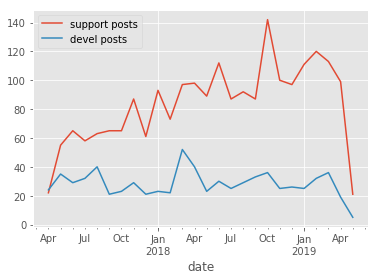

In [11]:
df.resample('M').sum().plot()

### 2017.04 to 2019.04:  Cumulative number of Discourse posts

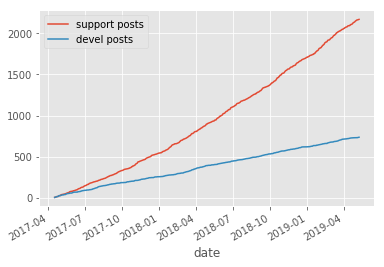

In [12]:
df.cumsum().plot()